# Temperature history of Ljubljana

This script assesses the yearly temperature average measured in Ljubljana, Slovenia. The data is sourced from a Copernicus dataset that includes daily average temperatures of 1000 cities from around the world. Years range from 1980 to 2020, where the 2020 data only reaches September. Thus, some analysis will be done until 2019 only.

Data source: [Kaggle](https://www.kaggle.com/datasets/hansukyang/temperature-history-of-1000-cities-1980-to-2020)

## Table of Contents
* [Exploring the dataset](#chapter1)
* [Ljubljana](#chapter2)
    * [Yearly distribution of temperature](#section_2_1)
    * [Linear regression](#section_2_2)
        * [Correlation](#sub_section_2_2_1)
        * [Linear regression](#sub_section_2_2_2)
        * [Assumption of regression](#sub_section_2_2_3)

In [3]:
# Import packages:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math 
from sklearn.linear_model import LinearRegression
import math 
import matplotlib.colors #colormaps
from matplotlib import cm #colormaps
import seaborn as sns
import statsmodels.api as sm

## Exploring the dataset  <a class="anchor" id="chapter1"></a>

In [6]:
# Import file

df = pd.read_csv('Kaggle/daily_temperature_1000_cities_1980_2020.csv', header=1, skiprows=[2,3,4,5,6,7,8,9,10,11,12])
df.rename(columns={'city':'date'}, inplace=True) #rename header name
df.head(5)
#df.tail(5)

,date,Tokyo,New York,Mexico City,Mumbai,São Paulo,Delhi,Shanghai,Kolkata,Los Angeles,...,Bilāspur,Sargodha,Leipzig,Tinnevelly,Cancún,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Göteborg
0,1980-01-01,4.16,1.48,11.35,23.40,17.86,13.74,9.10,20.47,14.24,...,22.14,11.54,0.67,24.05,21.21,3.71,-13.88,11.68,17.67,-0.82
1,1980-01-02,4.06,1.00,10.01,22.67,18.65,12.85,6.40,19.37,13.77,...,22.26,11.13,-0.88,24.19,23.29,3.26,-15.05,13.71,17.70,-5.25
2,1980-01-03,7.12,-3.23,9.67,22.30,18.42,10.50,5.43,18.71,12.08,...,21.09,10.28,-4.30,24.39,24.04,2.17,-14.19,13.00,11.19,-13.00
3,1980-01-04,9.23,-1.81,10.12,23.40,19.21,10.87,2.29,18.76,11.19,...,20.39,10.98,-6.75,24.12,21.49,-0.95,-15.09,12.67,14.22,-11.75
4,1980-01-05,3.20,-4.31,10.81,23.98,21.34,11.03,2.40,18.62,12.78,...,19.51,11.27,0.10,23.86,21.20,-0.66,-13.85,10.09,18.30,-2.72


In [7]:
# Dataset summary
df.describe()

,Tokyo,New York,Mexico City,Mumbai,São Paulo,Delhi,Shanghai,Kolkata,Los Angeles,Dhaka,...,Bilāspur,Sargodha,Leipzig,Tinnevelly,Cancún,Yangzhou,Novokuznetsk,Latakia,Heroica Matamoros,Göteborg
count,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,...,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000
mean,15.748201,12.402294,14.985392,26.548575,19.806856,24.774463,16.816658,26.238726,17.219675,25.615314,...,26.615312,24.361660,9.808599,28.365179,26.038744,15.865681,2.344670,19.245169,23.630688,7.677228
std,7.946608,9.388593,2.456274,1.776946,3.280561,7.188223,8.697728,4.211970,4.918928,4.139583,...,5.069008,8.096094,7.668969,2.146033,1.758168,9.299423,13.621992,5.568069,5.418240,7.177451
min,-5.110000,-16.920000,5.670000,18.600000,7.090000,5.920000,-6.210000,13.370000,1.990000,10.810000,...,13.360000,6.030000,-19.620000,21.910000,16.510000,-7.810000,-44.010000,2.020000,-4.050000,-22.500000
25%,8.460000,4.770000,13.370000,25.580000,17.630000,18.400000,9.160000,23.160000,13.367500,22.517500,...,22.800000,16.800000,4.000000,26.580000,25.050000,7.610000,-7.830000,14.420000,20.370000,2.517500
50%,16.230000,12.680000,15.310000,26.720000,20.090000,26.790000,17.620000,27.790000,16.950000,27.170000,...,26.830000,25.900000,10.040000,28.580000,26.320000,16.780000,3.370000,19.320000,24.790000,7.690000
75%,22.290000,20.960000,16.580000,27.760000,22.272500,30.450000,24.040000,29.310000,21.070000,28.790000,...,29.390000,31.420000,15.850000,29.970000,27.390000,23.860000,14.290000,24.582500,28.180000,13.610000
max,32.390000,31.670000,22.560000,31.460000,28.660000,40.340000,34.530000,35.380000,33.160000,32.690000,...,40.440000,39.930000,29.400000,34.120000,29.450000,33.810000,27.850000,30.840000,31.810000,25.710000


In [8]:
# Number of cities:

no_cities = df.shape[1] - 1
no_cities

1000

In [9]:
# A list of columns that contain empty cells:

df.columns[df.isna().any()].tolist()

[]

In [10]:
# Check data types
df.dtypes

date                  object
Tokyo                float64
New York             float64
Mexico City          float64
Mumbai               float64
                      ...   
Yangzhou             float64
Novokuznetsk         float64
Latakia              float64
Heroica Matamoros    float64
Göteborg             float64
Length: 1001, dtype: object

In [11]:
# Convert 'date' column data to 'date time' type
dates = pd.to_datetime(df.iloc[:,0])

df['date'] = dates.values #replace the values in 'date' column with formated dates
df.dtypes

date                 datetime64[ns]
Tokyo                       float64
New York                    float64
Mexico City                 float64
Mumbai                      float64
                          ...      
Yangzhou                    float64
Novokuznetsk                float64
Latakia                     float64
Heroica Matamoros           float64
Göteborg                    float64
Length: 1001, dtype: object

Summary:
- The first date with recorded temperature is January 1 1980
- The last date with recorded temperature is September 30 2020
- There is 1000 cities in the dataset
- Each city contains 14884 records of temperature
- There is no missing values
- We converted *date* to appropriate data type

# Ljubljana <a class="anchor" id="chapter2"></a>

We want to extract data for Ljubljana, which is the city we are particualrly interested in.

Text(0.5, 1.0, 'Ljubljana')

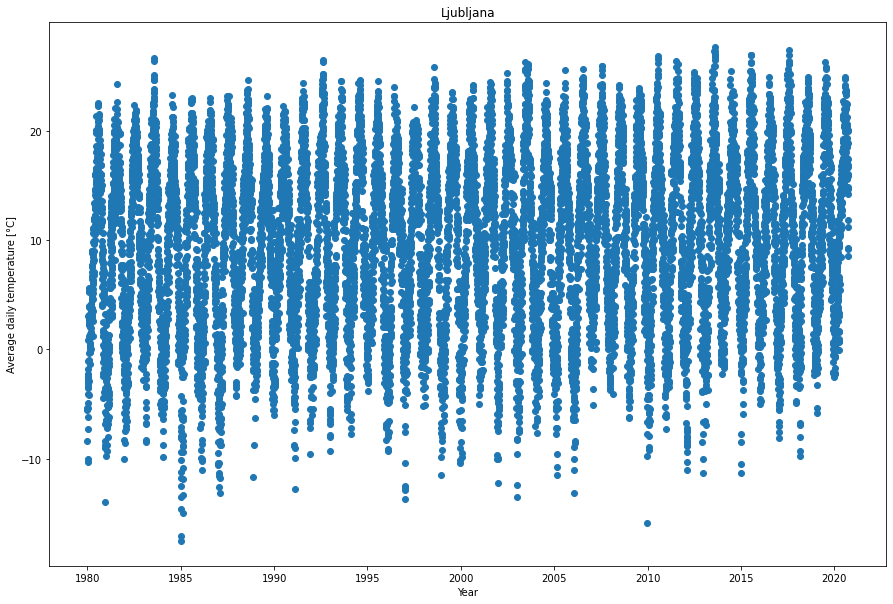

In [12]:
# First look at Ljubljana's data

plt.figure(figsize=(15,10))
plt.scatter(dates, df.Ljubljana)
plt.xlabel('Year')
plt.ylabel('Average daily temperature [°C]')
plt.title('Ljubljana')

## Yearly distribution of temperature <a class="anchor" id="section_2_1"></a>

We would like to see what is the distribution of temperatures for a specific year. We compare the distributions of years that are further apart and have similar lengths, 1980 and 2019.

In [13]:
# Extract year from 'date' and insert the new column at the end of the dataset
df['year'] = df['date'].dt.year

In [14]:
# Function that returns a new dataset that contains records of temperature for a desired year

def lj_leto(data, year):
    '''
    Returns a dataframe that contains records of temperature for a desired year
    
    Parameters:
    data - dataframe from which we extract values
    year - desired year
    '''
    
    lj_1 = data.loc[data['year'] == year, 'Ljubljana'].to_frame(name=year).reset_index(drop=True)
    return lj_1

In [15]:
lj_1980 = lj_leto(df, 1980)
lj_1990 = lj_leto(df, 1990)
lj_2000 = lj_leto(df, 2000)
lj_2010 = lj_leto(df, 2010)
lj_2019 = lj_leto(df, 2019)
lj_2020 = lj_leto(df, 2020)

#desired_years = [1980, 1990, 2000, 2010, 2019, 2020]

In [16]:
lj_leta = pd.concat([lj_1980, lj_1990, lj_2000, lj_2010, lj_2019, lj_2020], axis=1)
lj_leta

,1980,1990,2000,2010,2019,2020
0,-5.36,-2.88,-7.14,5.64,1.76,0.02
1,-5.52,-3.16,-1.65,2.49,1.04,-0.36
2,-8.43,-2.55,-3.64,-4.17,-0.32,-0.40
3,-10.33,-3.58,-4.06,-4.37,-2.11,1.54
4,-3.56,-4.68,-3.60,-2.03,-1.31,1.43
...,...,...,...,...,...,...
361,0.41,1.69,5.07,-2.30,0.06,NaN
362,-1.63,0.49,3.45,-2.15,-2.29,NaN
363,-6.43,4.00,2.33,-1.53,-2.57,NaN
364,-6.55,3.95,0.14,-1.56,0.28,NaN


In [17]:
print(lj_leta.info())
print(lj_leta.columns[lj_leta.isna().any()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1980    366 non-null    float64
 1   1990    365 non-null    float64
 2   2000    366 non-null    float64
 3   2010    365 non-null    float64
 4   2019    365 non-null    float64
 5   2020    274 non-null    float64
dtypes: float64(6)
memory usage: 17.3 KB
None
Int64Index([1990, 2010, 2019, 2020], dtype='int64')


There are two reasons for years having different lengths:
- Leap year: 1980, 2000
- The last date of recorded data for 2020 is Sept 30 (274 days)

1980 median:  7.975 
 2019 median:  10.86


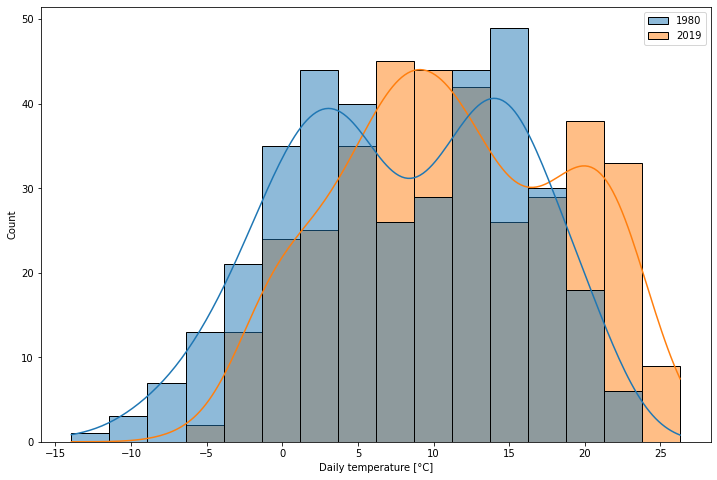

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=lj_leta[[1980, 2019]], kde=True, common_norm=True)
plt.xlabel('Daily temperature [°C]')
plt.ylabel('Count')
print('1980 median: ',lj_1980.median().tolist()[0], '\n','2019 median: ',lj_2019.median().tolist()[0])

**1980** seems to have to modes, with similar frequencies. The histogram is quite symmetric around the median (7.9°C). This corresponds to the well-balanced seasons.\
**2019** has an asymmetric distribution, where higher temperatures are more frequent than in the year 1980.

Because histogram could significantly vary with each year we choose to analyze, we can't form conclusions of all the data, based on only one comparison of two years. Now we compare distributions of all the years we are interested in, but because a histogram would get very busy and hard to read, we use boxplots.

Text(0, 0.5, 'Temperature [°C]')

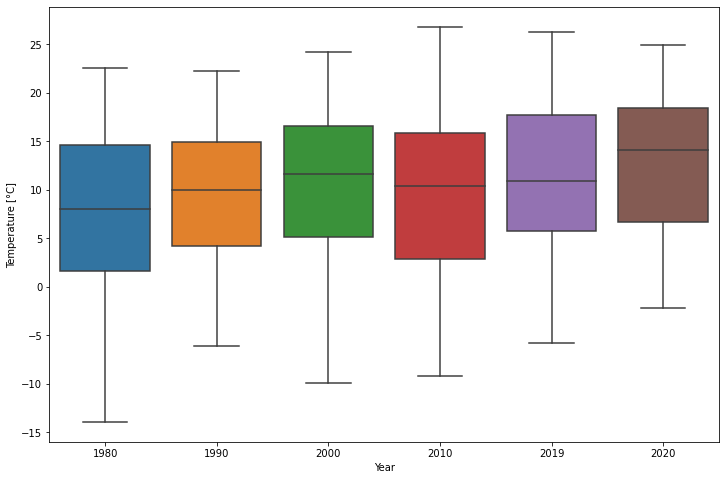

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=lj_leta)
plt.xlabel('Year')
plt.ylabel('Temperature [°C]')

There seems to exist a slight trend in temperatures as the years progress, but because of the spread of the data and its dependance on particular year, we can't form conclusions just yet. To analyze trends in temperatures, we will preform a regression across mean temperature of each year. For this, we need to create a new dataframe.

## Linear regression <a class="anchor" id="section_2_2"></a>

**Creating a new dataframe for Ljubljana**

In [20]:
# Group data by years and calculate a mean for each year. Save values in a new dataframe.

LJ = pd.DataFrame({'Tavg' : df.groupby(df.date.dt.year)['Ljubljana'].mean()}).reset_index() #reset index to cleanup the set

**Some aggregates**

In [21]:
LJ_std = pd.DataFrame({'std': df.groupby(df.date.dt.year)['Ljubljana'].std(ddof=0)}).reset_index()
LJ_median = pd.DataFrame({'median': df.groupby(df.date.dt.year)['Ljubljana'].median()}).reset_index()

In [22]:
LJ.insert(2, 'median', LJ_median['median'])
LJ.insert(2, 'std', LJ_std['std'])

In [23]:
LJ.head()

,date,Tavg,std,median
0,1980,7.837623,7.733123,7.975
1,1981,8.680959,8.280414,10.590
2,1982,9.334822,7.908429,9.590
3,1983,9.445726,8.180333,10.070
4,1984,8.385273,7.253825,9.560


<AxesSubplot:xlabel='date'>

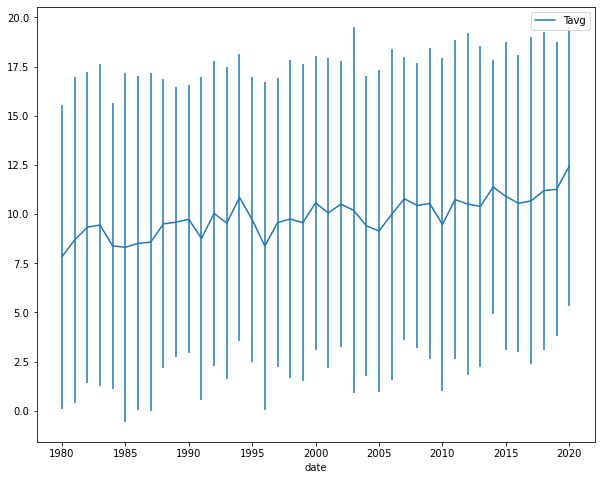

In [24]:
LJ.plot('date', 'Tavg', yerr='std', figsize=(10,8))

Standard deviation for each year is due to averaging the data. We see that there seems to be an upwards trend in temperatures, but due to deviation being large, trend may not exist.

### Correlation <a class="anchor" id="sub_section_2_2_1"></a>

In [30]:
# Correlation between time and temperature:
# For a linear relationship between variables, we look at the Pearson correlation coefficient.

LJ[['date', 'Tavg']].corr(method='pearson')

,date,Tavg
date,1.00000,0.80982
Tavg,0.80982,1.00000


There seems to be a high positive correlation between time and temperature $(0.7 < r < 0.9)$.\
We will determine if the correlation is significant by performing a linear regression and hypothesis testing.

### Linear regression <a class='anchor' id='sub_section_2_2_2'></a>

Question: Is Ljubljana heating up?\
$H_0$: Average yearly temperature of Ljubljana didn't significantly change in the last 40 years. (slope of regression = 0)\
$H_1$: Average yearly temperature of Ljubljana has significantly changed.

Significance threshold = 0.05

In [31]:
model = sm.OLS.from_formula('Tavg ~ date', data = LJ)
results = model.fit()
results.params

Intercept   -123.398942
date           0.066641
dtype: float64

In [33]:
results.params[0]
yrs = list(range(len(LJ['date'])))

In [34]:
reg_line = list(results.params[1]*LJ['date'] + results.params[0])

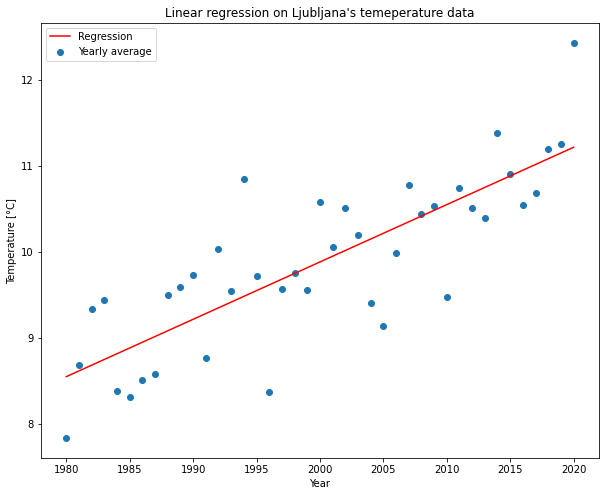

In [58]:
plt.figure(figsize=(10,8))
plt.plot(LJ['date'], reg_line, c='r', label='Regression')
plt.scatter(LJ['date'], LJ['Tavg'], label='Yearly average')
plt.xlabel('Year')
plt.ylabel('Temperature [°C]')
plt.title('Linear regression on Ljubljana\'s temeperature data')
plt.legend()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Tavg   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     74.31
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           1.44e-10
Time:                        17:13:24   Log-Likelihood:                -35.219
No. Observations:                  41   AIC:                             74.44
Df Residuals:                      39   BIC:                             77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -123.3989     15.462     -7.981      0.000    -154.674     -92.124
date           0.0666      0.008      8.620      0.000       0.051       0.082
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.021
Skew:                           0.046   Prob(JB):                        0.990
Kurtosis:                       2.939   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**p-values**: In the summary table, we can see that P-value for both parameters is approximately 0. Because p-value is outside of the confidence intervals, we reject the null hypothesis $H_0$.

**F-statistic**: This statistic tells us the goodness of fit of a regression. If the probability of $F=74.31$ is close to zero $(1.44\cdot10^{-10})$ we can reject the null hypothesis.

**Conclusion:** We reject the null hypothesis. Ljubljana's average temperature significantly changed in the last 40 years.


### Assumptions of regression <a class='chapter' id='sub_section_2_2_3'></a>

In [ ]:
# https://ethanweed.github.io/pythonbook/05.04-regression.html#hypothesis-tests-for-regression-models

**Checking the normality of the residuals**

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

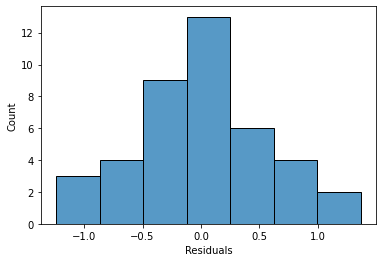

In [45]:
residuals = pd.DataFrame(results.resid, columns=['Residuals'])
sns.histplot(data=residuals, x='Residuals')
#sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


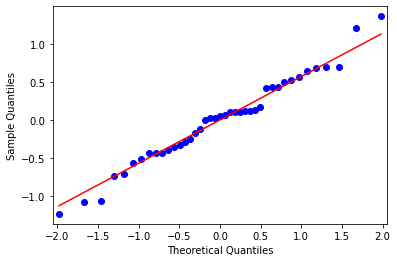

In [48]:
res_fig = sm.qqplot(residuals['Residuals'], line='s')

If residuals were perfectly normally distributed, then they would lie wight on the red line.\
The Q-Q plot further confirms our conviction based on the histogram, that it is appropriate to model these data with linear regression.

**Checking homoscedasticity**

The residuals have equal variation across all values of the predictor variable. If the homoscedasticity assumption is met, then this plot will look like a random splatter of points, centered around y=0.

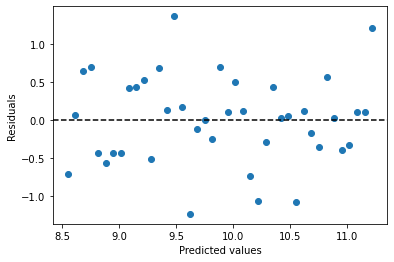

In [49]:
plt.scatter(reg_line, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, ls='--', c='k')
plt.show()